In [1]:
%pip install --upgrade yfinance

  Using cached yfinance-0.2.55-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached frozendict-2.4.6-cp310-cp310-win_amd64.whl.metadata (23 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 3.0/3.0 MB 17.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached yfinance-0.2.55-py2.py3-none-any.whl (109 kB)
Using cached frozendict-2.4.6-cp310-cp310-win_amd64.whl (

In [2]:
import yfinance as yf 
print(yf.__version__)

0.2.55


In [110]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-15, end.month,end.day)

In [111]:
# stock="GOOG"
# ticker=yf.Ticker(stock)
# google_data=ticker.history(period="5y")
stock="GOOG"
google_data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [112]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2010-03-22,13.819996,14.051775,13.740175,13.785539,160792439
2010-03-23,13.609288,13.840076,13.435764,13.808594,220876809
2010-03-24,13.815782,13.878251,13.378748,13.522773,263592319
2010-03-25,13.953362,14.179439,13.848751,13.857675,157825359
2010-03-26,13.948652,14.065162,13.882466,14.012609,108252241


In [113]:
google_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2025-03-17,166.570007,168.460007,165.809998,167.324997,17839100
2025-03-18,162.669998,166.440002,158.800003,165.960007,24616800
2025-03-19,166.279999,168.132996,163.050003,163.914993,24955700
2025-03-20,165.050003,167.029999,163.139999,163.824997,19981500
2025-03-21,165.679993,165.770004,163.050003,163.320007,14223592


In [114]:
google_data.shape

(3775, 5)

In [115]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,3775.000000,3775.000000,3775.000000,3775.000000,3.775000e+03
mean,63.591933,64.229451,62.935188,63.561976,5.133483e+07
std,49.119110,49.655059,48.587447,49.092761,4.720321e+07
min,10.809839,10.963781,10.749354,10.865367,1.584340e+05
25%,25.586948,25.784765,25.407721,25.606578,2.371300e+07
50%,48.119583,48.402199,47.548292,48.107140,3.294800e+07
75%,99.170292,100.643309,97.424558,98.866724,6.729530e+07
max,207.473633,208.462496,204.027547,204.267279,5.952147e+08


In [116]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2010-03-22 to 2025-03-21
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   3775 non-null   float64
 1   (High, GOOG)    3775 non-null   float64
 2   (Low, GOOG)     3775 non-null   float64
 3   (Open, GOOG)    3775 non-null   float64
 4   (Volume, GOOG)  3775 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.0 KB


In [117]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

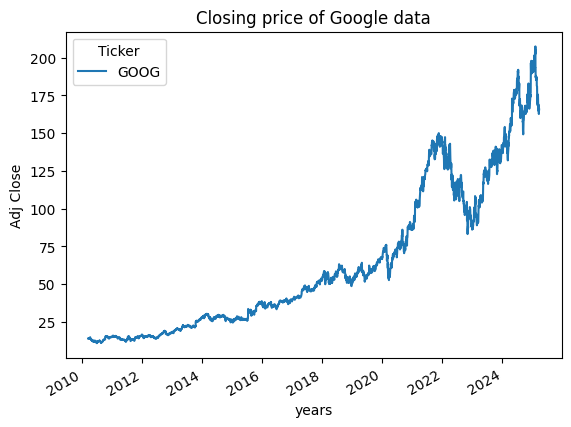

In [119]:
plt.figure(figsize=(15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [120]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [121]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

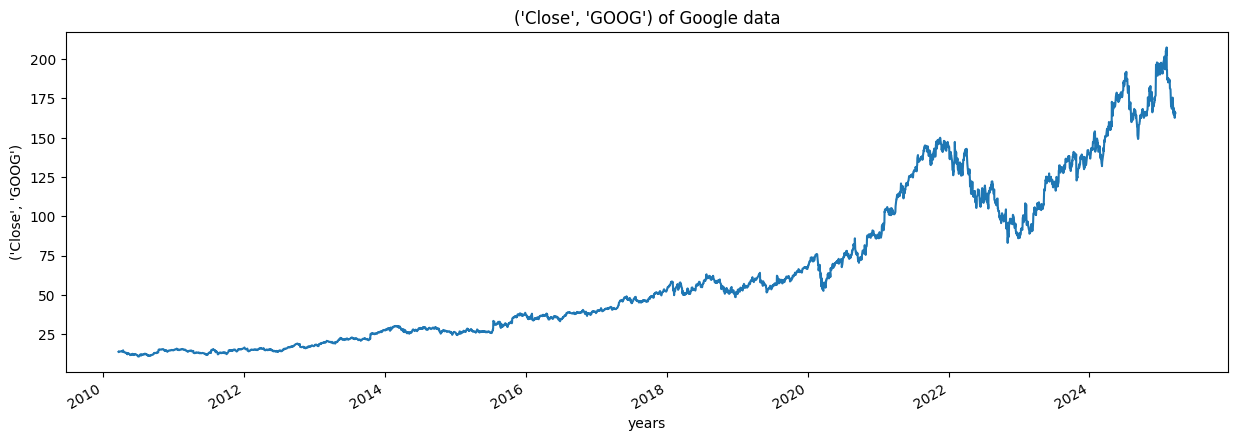

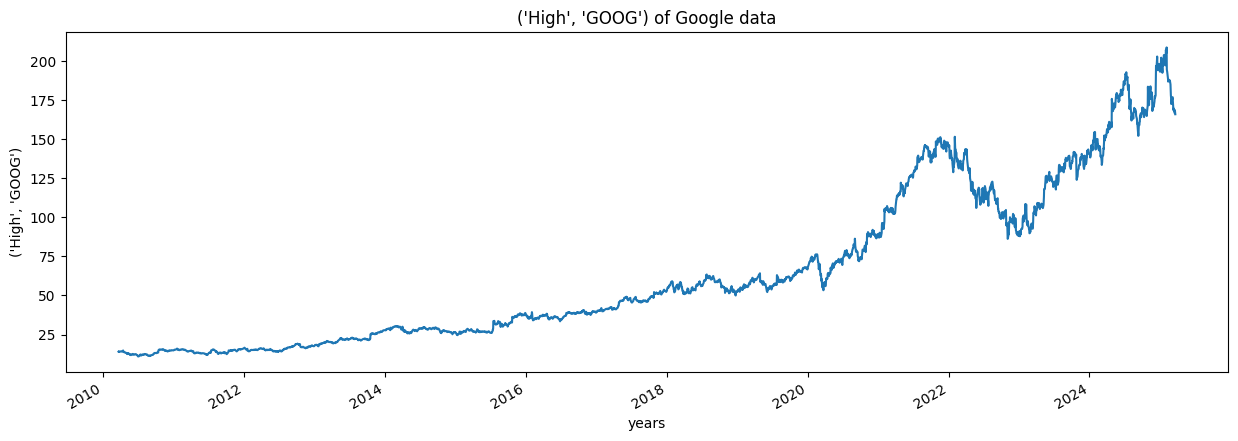

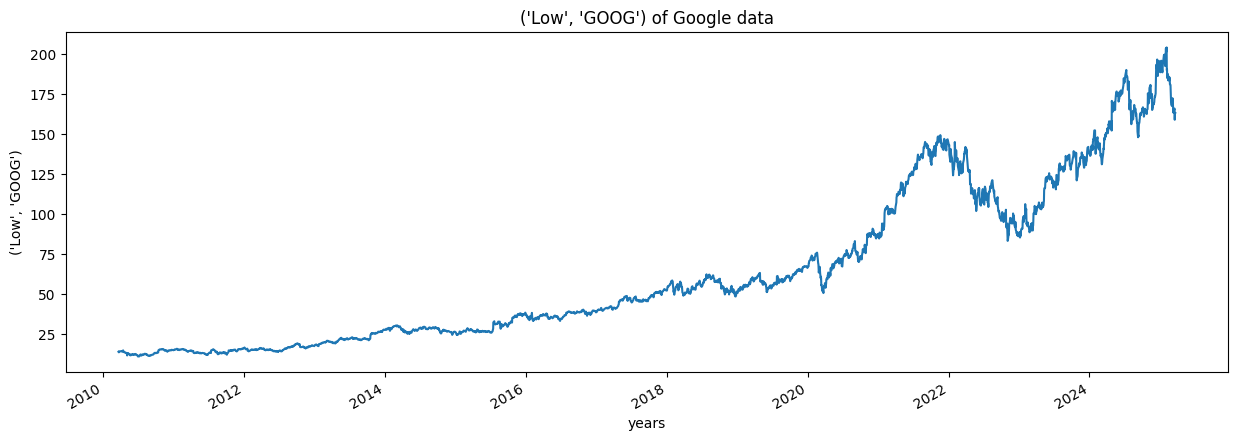

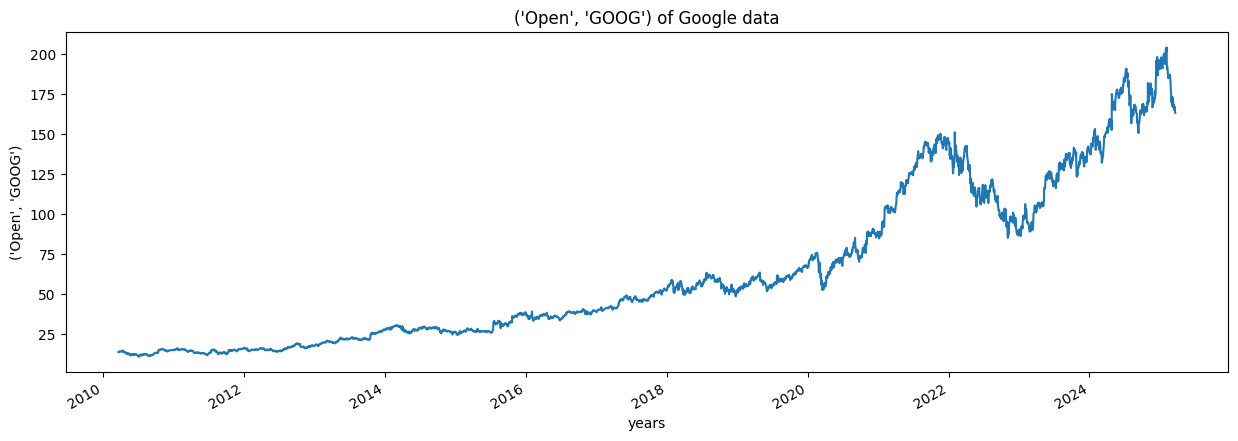

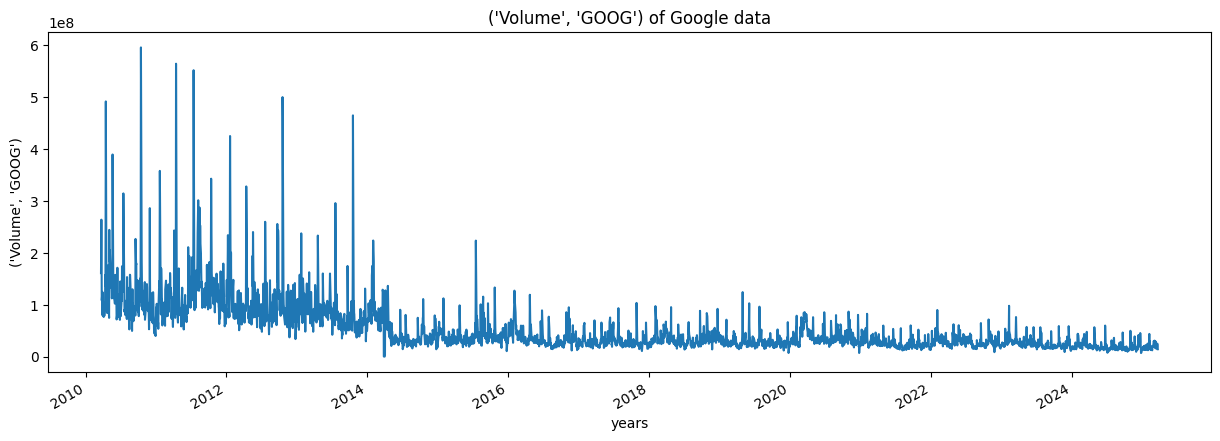

In [122]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [123]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [124]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [125]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [126]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 199
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [127]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [128]:
google_data['MA_for_250_days'][0:250].tail()

Date
2011-03-10          NaN
2011-03-11          NaN
2011-03-14          NaN
2011-03-15          NaN
2011-03-16    13.532216
Name: MA_for_250_days, dtype: float64

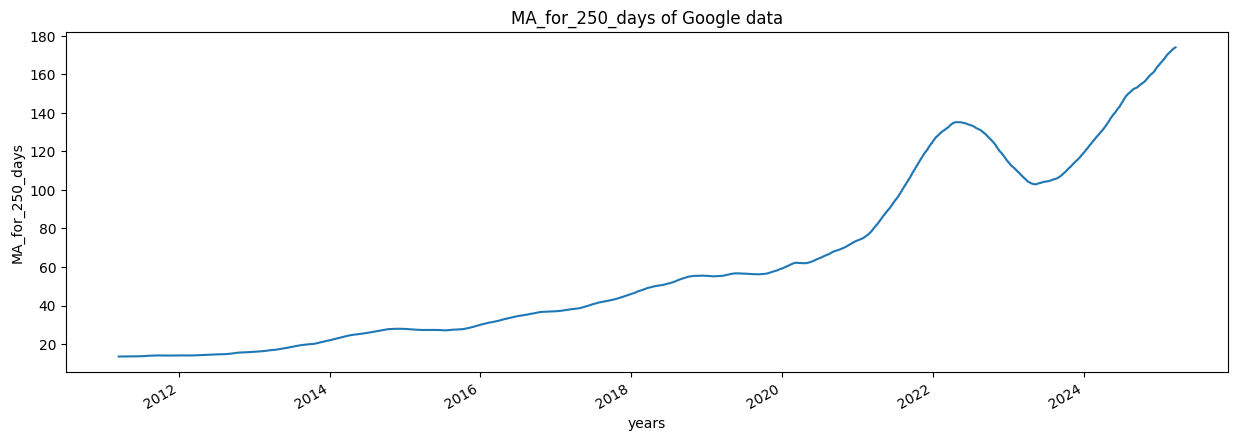

In [129]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

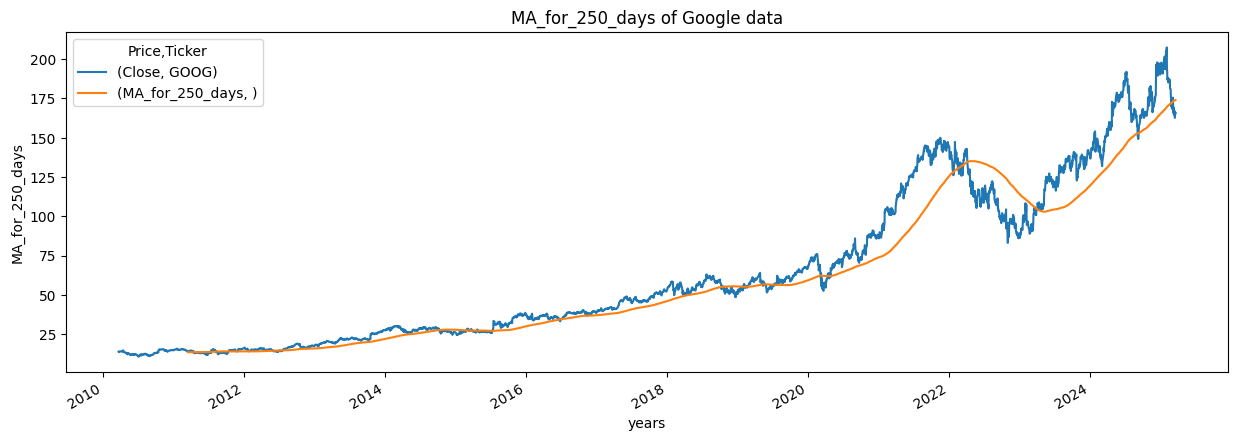

In [130]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

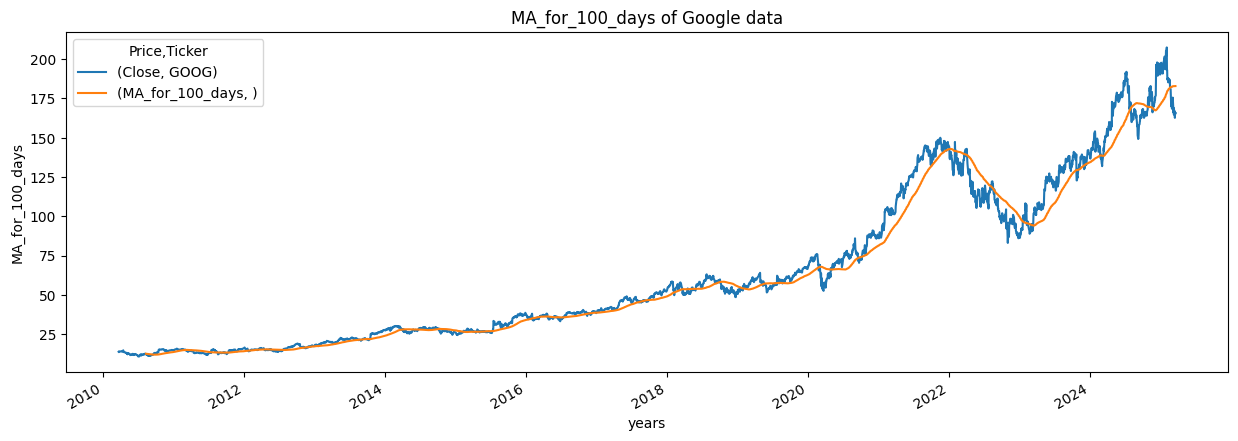

In [131]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

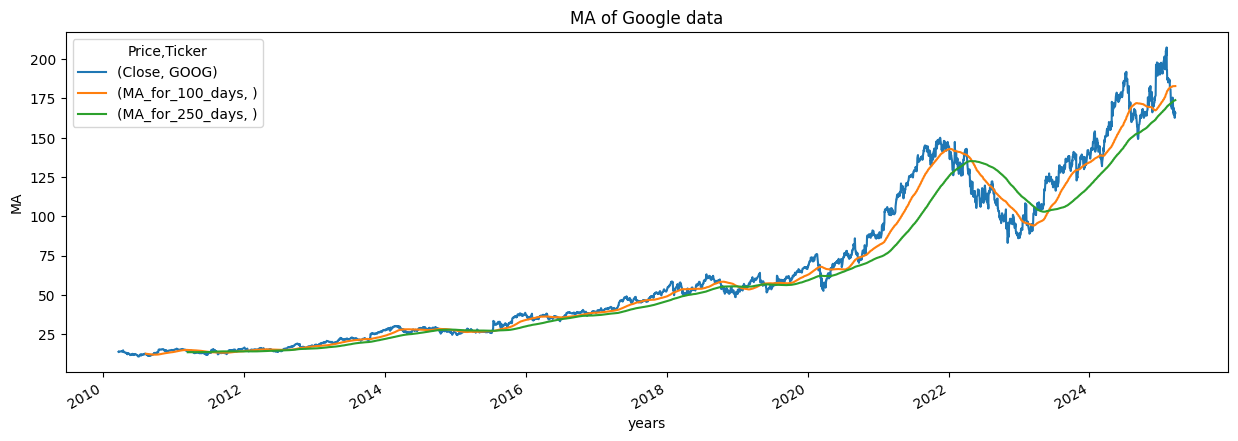

In [132]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [133]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2010-03-22,13.819996,NaN
2010-03-23,13.609288,-0.015247
2010-03-24,13.815782,0.015173
2010-03-25,13.953362,0.009958
2010-03-26,13.948652,-0.000337


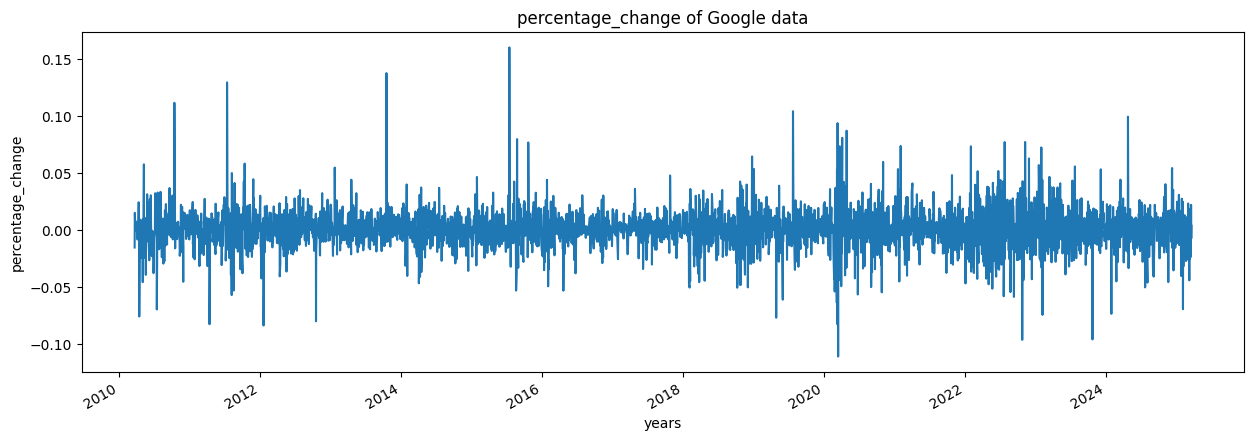

In [134]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [135]:
Adj_close_price = google_data[['Close']]

In [136]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([207.47363281]), array([10.80983925]))

In [137]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.0153061 ],
       [0.01423469],
       [0.01528468],
       ...,
       [0.79053778],
       [0.78428348],
       [0.78748686]], shape=(3775, 1))

In [138]:
len(scaled_data)

3775

In [139]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [140]:
x_data[0],y_data[0]

(array([[1.53061048e-02],
        [1.42346942e-02],
        [1.52846759e-02],
        [1.59842450e-02],
        [1.59602994e-02],
        [1.59300497e-02],
        [1.64670133e-02],
        [1.65186968e-02],
        [1.67304495e-02],
        [1.70090299e-02],
        [1.66573469e-02],
        [1.60674390e-02],
        [1.65653273e-02],
        [1.64052580e-02],
        [1.72258307e-02],
        [1.89955545e-02],
        [1.92766419e-02],
        [2.00707474e-02],
        [1.43796484e-02],
        [1.43733443e-02],
        [1.49960284e-02],
        [1.49027480e-02],
        [1.39901556e-02],
        [1.37292362e-02],
        [1.20464840e-02],
        [1.17212779e-02],
        [1.17376684e-02],
        [1.20918586e-02],
        [1.12977531e-02],
        [1.19153939e-02],
        [8.86123154e-03],
        [9.28854368e-03],
        [7.89065655e-03],
        [7.19360419e-03],
        [1.07872567e-02],
        [9.19904570e-03],
        [8.73770628e-03],
        [9.42971541e-03],
        [9.0

In [141]:

int(len(x_data)*0.7)

2572

In [142]:
len(scaled_data)-100-int(len(x_data)*0.7)

1103

In [143]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [144]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2572, 100, 1)
(2572, 1)
(1103, 100, 1)
(1103, 1)


In [40]:
# %pip uninstall keras
%pip install --upgrade keras

  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached keras-3.9.0-py3-none-any.whl (1.3 MB)
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 3.0/3.0 MB 15.7 MB/s eta 0:00:00
Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
# %pip uninstall tensorflow
%pip install --upgrade tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
    --------------------------------------- 4.7/375.7 MB 25.9 MB/s eta 0:00:15
   - -------------------------------------- 11.3/375.7 MB 28.2 MB/s eta 0:00:13
   - -------------------------------------- 16.5/37

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
# %pip install tensorflow==2.14 keras==2.14


In [145]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense, LSTM, Input # type: ignore

In [146]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [147]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [148]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - loss: 2.8939e-04
Epoch 2/2
2572/2572 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - loss: 9.2588e-05


In [149]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [150]:
predictions = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


In [151]:
predictions

array([[0.3255663 ],
       [0.32551232],
       [0.33587942],
       ...,
       [0.7697902 ],
       [0.7740865 ],
       [0.7742559 ]], shape=(1103, 1), dtype=float32)

In [152]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 74.836945],
       [ 74.826324],
       [ 76.86516 ],
       ...,
       [162.19969 ],
       [163.04462 ],
       [163.07794 ]], shape=(1103, 1), dtype=float32)

In [153]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 77.99259186],
       [ 80.66841888],
       [ 80.91823578],
       ...,
       [166.27999878],
       [165.05000305],
       [165.67999268]], shape=(1103, 1))

In [154]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
mean_actual= np.mean(inv_y_test)
relative_error=(rmse/mean_actual)*100
print(f"Relative Error: {relative_error: .2f}%")


Relative Error:  2.92%


In [155]:
rmse

np.float64(3.8448637372619663)

In [156]:
ploting_data=pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    },
    index= google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-10-29,77.992592,74.836945
2020-10-30,80.668419,74.826324
2020-11-02,80.918236,76.865158
2020-11-03,82.121536,78.346664
2020-11-04,87.044212,79.569176


<Figure size 640x480 with 0 Axes>

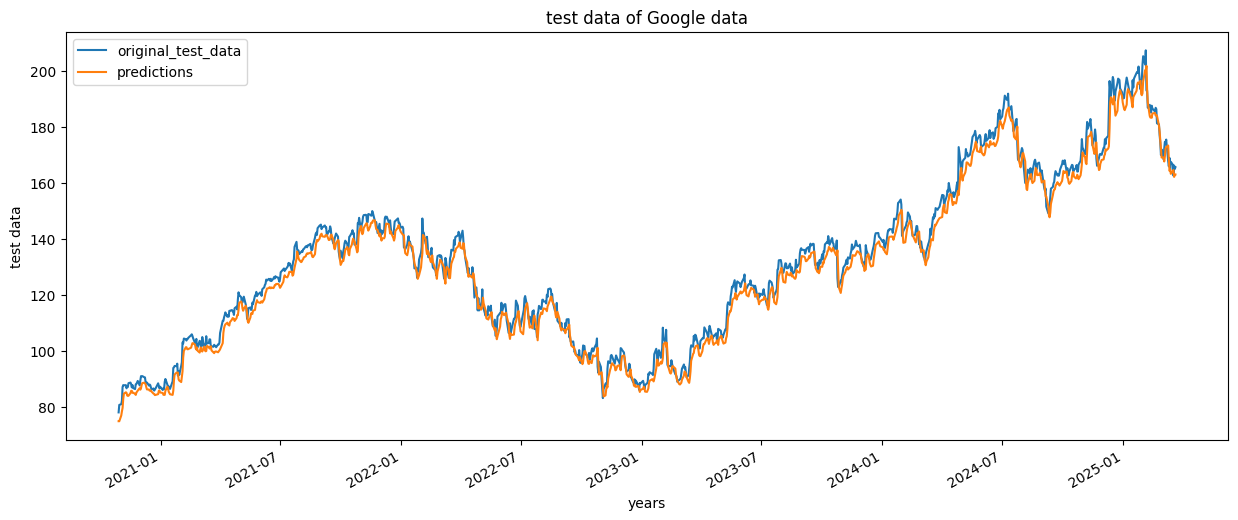

In [157]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

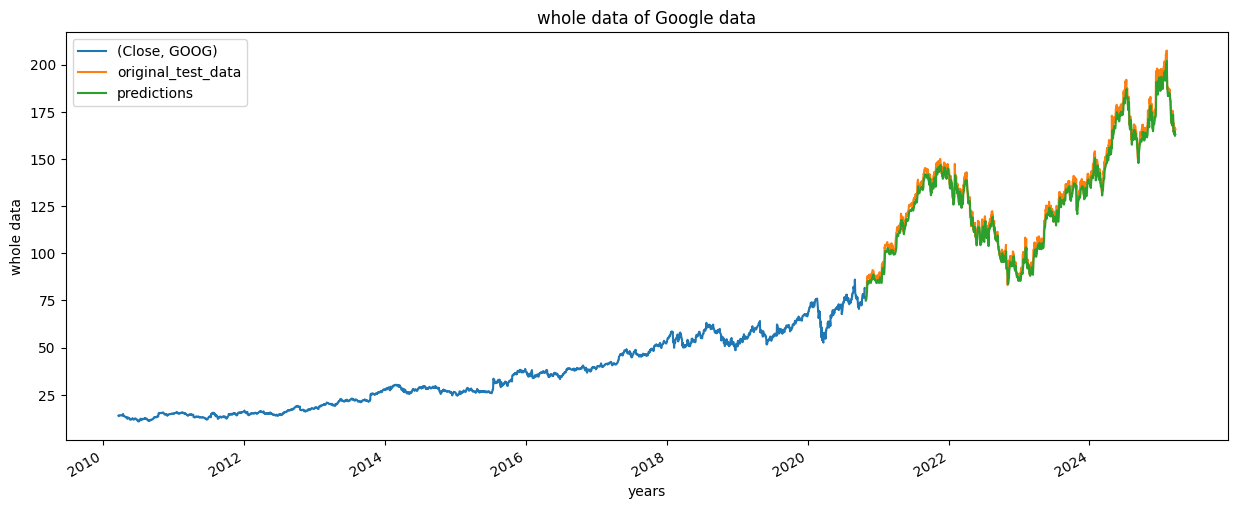

In [158]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [159]:
model.save("Latest_stock_price_model.keras")